In [1]:
import numpy as np 
import random
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from time import time
from networks import Population
import pickle

random.seed(0)
np.random.seed(0)

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os

import sys
sys.path.append("..")

import matplotlib.pyplot as plt

In [3]:
import networks

data_dir = Path("../data")

multimodal_train = pd.read_csv(data_dir / "multimodal-large-training.csv", index_col=False)
multimodal_test = pd.read_csv(data_dir / "multimodal-large-test.csv", index_col=False)

from sklearn import datasets

iris = datasets.load_iris()

X = iris["data"]
y = iris["target"]

In [4]:
# example definition of a neural network
layers = [
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"activation": "linear", "init": "normal"}
]

In [5]:
X_train = multimodal_train[["x"]].to_numpy()
X_test = multimodal_test[["x"]].to_numpy()

y_train =  multimodal_train[["y"]].to_numpy()
y_test = multimodal_test[["y"]].to_numpy()

layers = [
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"activation": "linear", "init": "normal"}
]

population = Population(layers, X_train, y_train, X_test, y_test)

population.generate_individuals(30)
print(population)

Population with 30 individuals


In [9]:
import pickle

experiment_filepath = Path("experiments_mlp")

def load_population(experiment_name, number = 1):
    with open(experiment_filepath / experiment_name / str(str(number) + ".pkl"), "rb") as f:
        return pickle.load(f)

In [10]:
import pandas as pd
experiment_filepath = Path("experiments_mlp")

def load_summary_experiment(experiment_name):
    avg_scores = pd.read_csv(experiment_filepath / experiment_name / "avg_individual_scores.csv")
    best_scores = pd.read_csv(experiment_filepath / experiment_name / "best_individual_scores.csv")
    
    avg_scores.columns = ["index", "exp1", "exp2", "exp3", "exp4", "exp5"]
    best_scores.columns = ["index", "exp1", "exp2", "exp3", "exp4", "exp5"]
        
    avg_scores.drop("index", axis=1, inplace=True)
    best_scores.drop("index", axis = 1, inplace = True)
    
    
    return best_scores, avg_scores

## Testing - multimodal

In [104]:
X_train = multimodal_train[["x"]].to_numpy()
X_test = multimodal_test[["x"]].to_numpy()

y_train =  multimodal_train[["y"]].to_numpy()
y_test = multimodal_test[["y"]].to_numpy()


best_scores_01, avg_scores_01 = load_summary_experiment("multimodal_0_1")
best_scores_001, avg_scores_001 = load_summary_experiment("multimodal_0_01")
best_scores_0001, avg_scores_0001 = load_summary_experiment("multimodal_0_001")

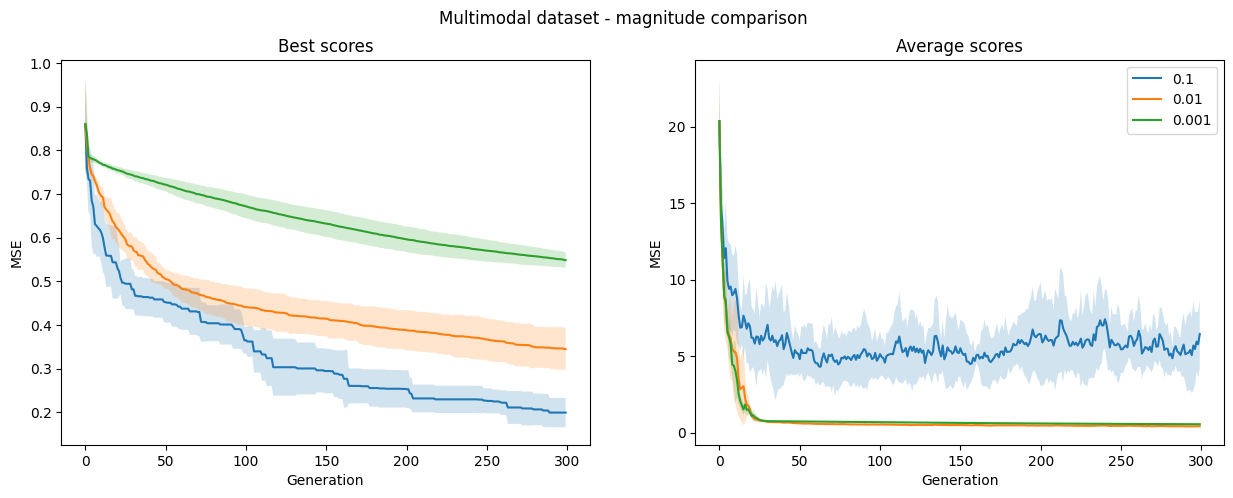

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

best_scores_01.mean(axis=1).plot(ax=axs[0], label="0.1")
best_scores_001.mean(axis=1).plot(ax=axs[0], label="0.01")
best_scores_0001.mean(axis=1).plot(ax=axs[0], label="0.001")


axs[0].fill_between(best_scores_01.index, best_scores_01.mean(axis=1) - best_scores_01.std(axis=1), best_scores_01.mean(axis=1) + best_scores_01.std(axis=1), alpha=0.2)
axs[0].fill_between(best_scores_001.index, best_scores_001.mean(axis=1) - best_scores_001.std(axis=1), best_scores_001.mean(axis=1) + best_scores_001.std(axis=1), alpha=0.2)
axs[0].fill_between(best_scores_0001.index, best_scores_0001.mean(axis=1) - best_scores_0001.std(axis=1), best_scores_0001.mean(axis=1) + best_scores_0001.std(axis=1), alpha=0.2)

axs[0].set_title("Best scores")
axs[0].set_xlabel("Generation")

avg_scores_01.mean(axis=1).plot(ax=axs[1], label="0.1")
avg_scores_001.mean(axis=1).plot(ax=axs[1], label="0.01")
avg_scores_0001.mean(axis=1).plot(ax=axs[1], label="0.001")

axs[1].fill_between(avg_scores_01.index, avg_scores_01.mean(axis=1) - avg_scores_01.std(axis=1), avg_scores_01.mean(axis=1) + avg_scores_01.std(axis=1), alpha=0.2)
axs[1].fill_between(avg_scores_001.index, avg_scores_001.mean(axis=1) - avg_scores_001.std(axis=1), avg_scores_001.mean(axis=1) + avg_scores_001.std(axis=1), alpha=0.2)
axs[1].fill_between(avg_scores_0001.index, avg_scores_0001.mean(axis=1) - avg_scores_0001.std(axis=1), avg_scores_0001.mean(axis=1) + avg_scores_0001.std(axis=1), alpha=0.2)

axs[1].set_title("Average scores")

axs[1].set_xlabel("Generation")
axs[1].set_ylabel("MSE")
axs[0].set_ylabel("MSE")

plt.legend()

fig.suptitle("Multimodal dataset - magnitude comparison")

plt.savefig("../img/mlp/multimodal_magnitude_comparison.png")

plt.show()


In [86]:
print("wartość magnitude & średni wynik & najlepszy wynik \\\\\\hline")
print("0.1 & " + "{:.2f}".format(avg_scores_01.mean(axis=1).iloc[-1]) + "±" + "{:.2f}".format(avg_scores_01.std(axis=1).iloc[-1]) + " & " + "{:.2f}".format(best_scores_01.mean(axis=1).iloc[-1])+"±" + "{:.2f}".format(best_scores_01.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("0.01 & " + "{:.2f}".format(avg_scores_001.mean(axis=1).iloc[-1]) + "±" + "{:.2f}".format(avg_scores_001.std(axis=1).iloc[-1]) + " & " + "{:.2f}".format(best_scores_001.mean(axis=1).iloc[-1])+"±" + "{:.2f}".format(best_scores_001.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("0.001 & " + "{:.2f}".format(avg_scores_0001.mean(axis=1).iloc[-1]) + "±" + "{:.2f}".format(avg_scores_0001.std(axis=1).iloc[-1]) + " & " + "{:.2f}".format(best_scores_0001.mean(axis=1).iloc[-1])+"±" + "{:.2f}".format(best_scores_0001.std(axis=1).iloc[-1]) + " \\\\ \\hline")

wartość magnitude & średni wynik & najlepszy wynik \\\hline
0.1 & 6.45±2.27 & 0.20±0.03 \\ \hline
0.01 & 0.42±0.04 & 0.34±0.05 \\ \hline
0.001 & 0.55±0.02 & 0.55±0.02 \\ \hline


In [87]:
best_individual_01 = load_population("multimodal_0_1", 1)
best_individual_001 = load_population("multimodal_0_01", 1)
best_individual_0001 = load_population("multimodal_0_001", 1)

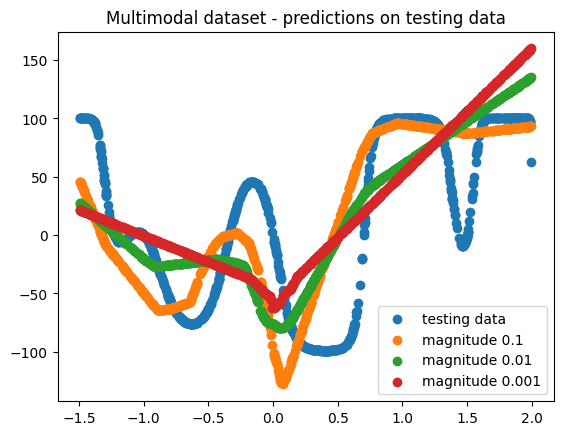

In [88]:
from sklearn.preprocessing import StandardScaler

yscaler = StandardScaler()

yscaler.fit(y_train)
y_train_norm = yscaler.transform(y_train)
y_pred = yscaler.inverse_transform(best_individual_01.predict(X_test.T))[0]
y_pred_001 = yscaler.inverse_transform(best_individual_001.predict(X_test.T))[0]
y_pred_0001 = yscaler.inverse_transform(best_individual_0001.predict(X_test.T))[0]


plt.scatter(X_test, y_test, label="testing data")
plt.scatter(X_test, y_pred, label="magnitude 0.1")
plt.scatter(X_test, y_pred_001, label="magnitude 0.01")
plt.scatter(X_test, y_pred_0001, label="magnitude 0.001")

plt.title("Multimodal dataset - predictions on testing data")
plt.legend()

plt.savefig("../img/mlp/multimodal_predictions.png")

# Iris dataset

In [89]:
# iris

X_train = iris["data"]
y_train = iris["target"].reshape(-1, 1)

X_test = iris["data"]
y_test = iris["target"].reshape(-1, 1)


In [107]:
best_scores_01, avg_scores_01 = load_summary_experiment("iris_0_1")
best_scores_001, avg_scores_001 = load_summary_experiment("iris_0_01")
best_scores_0001, avg_scores_0001 = load_summary_experiment("iris_0_001")

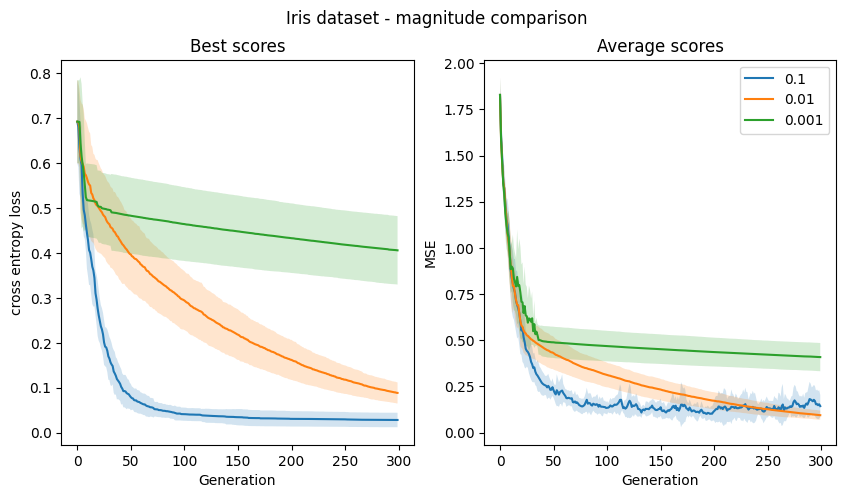

In [108]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

best_scores_01.mean(axis=1).plot(ax=axs[0], label="0.1")
best_scores_001.mean(axis=1).plot(ax=axs[0], label="0.01")
best_scores_0001.mean(axis=1).plot(ax=axs[0], label="0.001")

axs[0].fill_between(best_scores_01.index, best_scores_01.mean(axis=1) - best_scores_01.std(axis=1), best_scores_01.mean(axis=1) + best_scores_01.std(axis=1), alpha=0.2)
axs[0].fill_between(best_scores_001.index, best_scores_001.mean(axis=1) - best_scores_001.std(axis=1), best_scores_001.mean(axis=1) + best_scores_001.std(axis=1), alpha=0.2)
axs[0].fill_between(best_scores_0001.index, best_scores_0001.mean(axis=1) - best_scores_0001.std(axis=1), best_scores_0001.mean(axis=1) + best_scores_0001.std(axis=1), alpha=0.2)

axs[0].set_title("Best scores")
axs[0].set_xlabel("Generation")

avg_scores_01.mean(axis=1).plot(ax=axs[1], label="0.1")
avg_scores_001.mean(axis=1).plot(ax=axs[1], label="0.01")
avg_scores_0001.mean(axis=1).plot(ax=axs[1], label="0.001")

axs[1].fill_between(avg_scores_01.index, avg_scores_01.mean(axis=1) - avg_scores_01.std(axis=1), avg_scores_01.mean(axis=1) + avg_scores_01.std(axis=1), alpha=0.2)
axs[1].fill_between(avg_scores_001.index, avg_scores_001.mean(axis=1) - avg_scores_001.std(axis=1), avg_scores_001.mean(axis=1) + avg_scores_001.std(axis=1), alpha=0.2)
axs[1].fill_between(avg_scores_0001.index, avg_scores_0001.mean(axis=1) - avg_scores_0001.std(axis=1), avg_scores_0001.mean(axis=1) + avg_scores_0001.std(axis=1), alpha=0.2)

axs[1].set_title("Average scores")

axs[1].set_xlabel("Generation")
axs[1].set_ylabel("MSE")

plt.savefig("../img/mlp/iris_magnitude.png")
axs[0].set_ylabel("cross entropy loss")
fig.suptitle("Iris dataset - magnitude comparison")
plt.legend()
plt.show()


In [92]:
best_individual_01 = load_population("iris_0_1", 0)
best_individual_001 = load_population("iris_0_01", 0)
best_individual_0001 = load_population("iris_0_001", 0)

In [93]:
best_individual_01.predict(X_test.T)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Text(0.5, 1.0, 'True values')

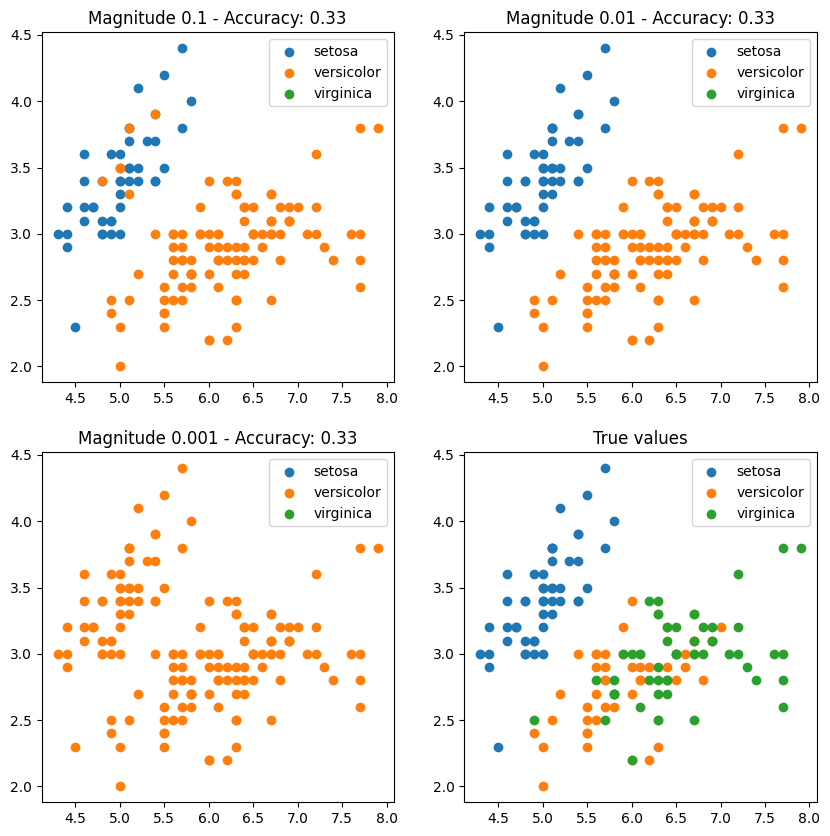

In [94]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

cmap = plt.get_cmap("viridis")

y_pred = best_individual_01.predict(X_test.T)

ax[0, 0].scatter(X_test[:, 0][y_pred == 0], X_test[:, 1][y_pred == 0], label="setosa")
ax[0, 0].scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], label="versicolor")
ax[0, 0].scatter(X_test[:, 0][y_pred == 2], X_test[:, 1][y_pred == 2], label="virginica")
ax[0, 0].set_title("Magnitude 0.1 - Accuracy: " + "{:.2f}".format(np.mean(best_individual_01.predict(X_test.T) == y_test)))


y_pred = best_individual_001.predict(X_test.T)

ax[0, 1].scatter(X_test[:, 0][y_pred == 0], X_test[:, 1][y_pred == 0], label="setosa")
ax[0, 1].scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], label="versicolor")
ax[0, 1].scatter(X_test[:, 0][y_pred == 2], X_test[:, 1][y_pred == 2], label="virginica")

ax[0, 1].set_title("Magnitude 0.01 - Accuracy: " + "{:.2f}".format(np.mean(best_individual_001.predict(X_test.T) == y_test)))

ax[0, 1].legend()

y_pred = best_individual_0001.predict(X_test.T)

ax[1, 0].scatter(X_test[:, 0][y_pred == 0], X_test[:, 1][y_pred == 0], label="setosa")
ax[1, 0].scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], label="versicolor")
ax[1, 0].scatter(X_test[:, 0][y_pred == 2], X_test[:, 1][y_pred == 2], label="virginica")

ax[1, 0].set_title("Magnitude 0.001 - Accuracy: " + "{:.2f}".format(np.mean(best_individual_0001.predict(X_test.T) == y_test)))

ax[1, 0].legend()


ax[0, 0].legend()
y_test = y_test.flatten()
ax[1, 1].scatter(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], label="setosa")
ax[1, 1].scatter(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], label="versicolor")
ax[1, 1].scatter(X_test[:, 0][y_test == 2], X_test[:, 1][y_test == 2], label="virginica")

ax[1, 1].legend()
ax[1, 1].set_title("True values")

# MPG

In [116]:
data = pd.read_csv("../data/auto-mpg.data", delim_whitespace=True, header=None)

data.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
data = data[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin"]]

data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy().reshape(-1, 1)

C:\Users\tymot\AppData\Local\Temp\ipykernel_4564\2819501823.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("../data/auto-mpg.data", delim_whitespace=True, header=None)


In [118]:
best_scores_01, avg_scores_01 = load_summary_experiment("mpg_0_1")
best_scores_001, avg_scores_001 = load_summary_experiment("mpg_0_01")
best_scores_0001, avg_scores_0001 = load_summary_experiment("mpg_0_001")

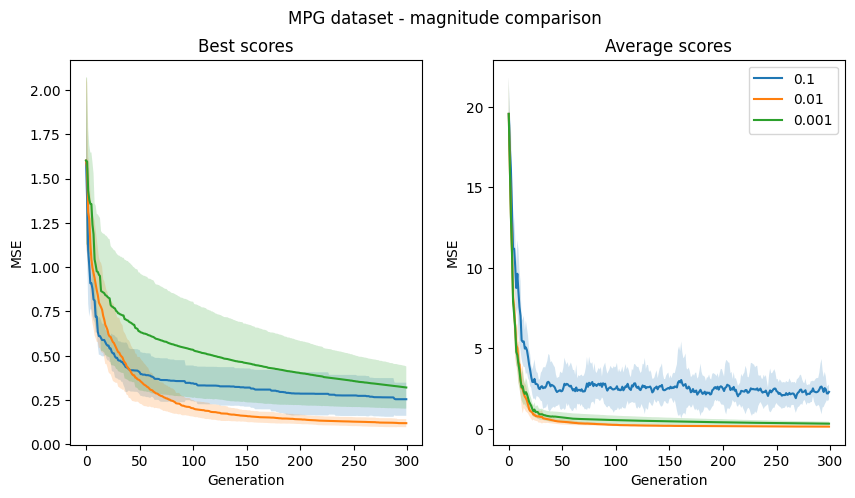

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

best_scores_01.mean(axis=1).plot(ax=axs[0], label="0.1")
best_scores_001.mean(axis=1).plot(ax=axs[0], label="0.01")
best_scores_0001.mean(axis=1).plot(ax=axs[0], label="0.001")

axs[0].fill_between(best_scores_01.index, best_scores_01.mean(axis=1) - best_scores_01.std(axis=1), best_scores_01.mean(axis=1) + best_scores_01.std(axis=1), alpha=0.2)
axs[0].fill_between(best_scores_001.index, best_scores_001.mean(axis=1) - best_scores_001.std(axis=1), best_scores_001.mean(axis=1) + best_scores_001.std(axis=1), alpha=0.2)
axs[0].fill_between(best_scores_0001.index, best_scores_0001.mean(axis=1) - best_scores_0001.std(axis=1), best_scores_0001.mean(axis=1) + best_scores_0001.std(axis=1), alpha=0.2)

axs[0].set_title("Best scores")
axs[0].set_xlabel("Generation")

avg_scores_01.mean(axis=1).plot(ax=axs[1], label="0.1")
avg_scores_001.mean(axis=1).plot(ax=axs[1], label="0.01")
avg_scores_0001.mean(axis=1).plot(ax=axs[1], label="0.001")

axs[1].fill_between(avg_scores_01.index, avg_scores_01.mean(axis=1) - avg_scores_01.std(axis=1), avg_scores_01.mean(axis=1) + avg_scores_01.std(axis=1), alpha=0.2)
axs[1].fill_between(avg_scores_001.index, avg_scores_001.mean(axis=1) - avg_scores_001.std(axis=1), avg_scores_001.mean(axis=1) + avg_scores_001.std(axis=1), alpha=0.2)
axs[1].fill_between(avg_scores_0001.index, avg_scores_0001.mean(axis=1) - avg_scores_0001.std(axis=1), avg_scores_0001.mean(axis=1) + avg_scores_0001.std(axis=1), alpha=0.2)

axs[1].set_title("Average scores")
axs[1].set_xlabel("Generation")

plt.legend()
axs[0].set_ylabel("MSE")
axs[1].set_ylabel("MSE")
fig.suptitle("MPG dataset - magnitude comparison")

fig.savefig("../img/mlp/mpg_magnitude.png")
plt.show()



In [131]:
best_scores = {"0.1":[], "0.01":[], "0.001":[]}
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

for i in range(0, 4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    yscaler = StandardScaler()  
    yscaler.fit(y_train)
    y_test = yscaler.transform(y_test)

    best_ind = load_population("mpg_0_1", i)
    best_scores["0.1"].append(best_ind.calculate_loss(X_test.T, y_test))
    
    best_ind = load_population("mpg_0_01", i)
    best_scores["0.01"].append(best_ind.calculate_loss(X_test.T, y_test))
    
    best_ind = load_population("mpg_0_001", i)
    best_scores["0.001"].append(best_ind.calculate_loss(X_test.T, y_test))
    

best_scores = pd.DataFrame(best_scores)



print("magnitude & wynik najlepszego osobnika \\\\ \\hline")
print("0.1 & " + "{:.2f}".format(best_scores["0.1"].mean()) + "±" + "{:.2f}".format(best_scores["0.1"].std()) + " \\\\ \\hline")
print("0.01 & " + "{:.2f}".format(best_scores["0.01"].mean()) + "±" + "{:.2f}".format(best_scores["0.01"].std()) + " \\\\ \\hline")
print("0.001 & " + "{:.2f}".format(best_scores["0.001"].mean()) + "±" + "{:.2f}".format(best_scores["0.001"].std()) + " \\\\ \\hline")    

magnitude & wynik najlepszego osobnika \\ \hline
0.1 & 2.03±0.26 \\ \hline
0.01 & 1.99±0.21 \\ \hline
0.001 & 2.15±0.16 \\ \hline


In [130]:
best_scores["0.001"].mean()

1011345.0326765075